In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("./datasets/spam-email+sms-dataset.csv")

In [24]:
columns = df.columns.tolist()


def display_columns(columns):
    for column in columns:
        print(column)


print(f"COLUMNS: \n---------------")
display_columns(columns)
print(f"---------------\n")

COLUMNS: 
---------------
message
message_type
spam
---------------



In [25]:
data_types = df.dtypes
print(f"DATA TYPES: \n---------------\n {data_types}")
print(f"---------------\n")

DATA TYPES: 
---------------
 message         object
message_type    object
spam             int64
dtype: object
---------------



In [26]:
missing_data_summary = df.isnull().sum()
print(f"MISSING DATA: \n---------------\n {missing_data_summary}")
print(f"---------------\n")

MISSING DATA: 
---------------
 message         1
message_type    0
spam            0
dtype: int64
---------------



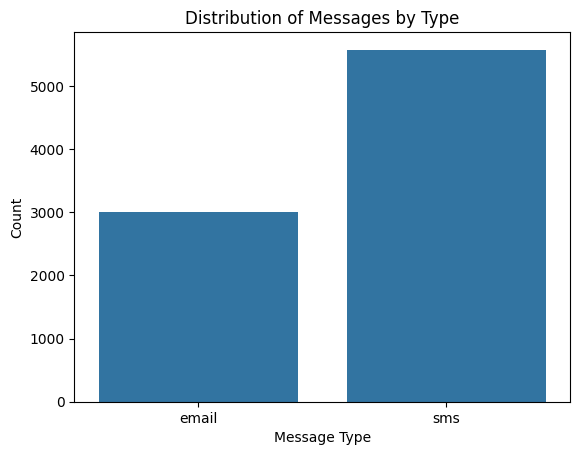

In [13]:
# Assuming 'message_type' column exists with values 'email' and 'sms'
sns.countplot(data=df, x="message_type")
plt.title("Distribution of Messages by Type")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

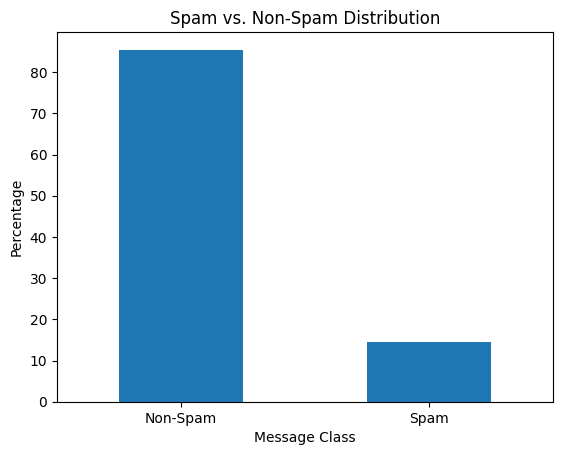

In [14]:
# Assuming 'spam' column exists with binary values where 1 indicates spam
spam_counts = df["spam"].value_counts(normalize=True) * 100
spam_counts.plot(kind="bar")
plt.title("Spam vs. Non-Spam Distribution")
plt.xlabel("Message Class")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=["Non-Spam", "Spam"], rotation=0)
plt.show()

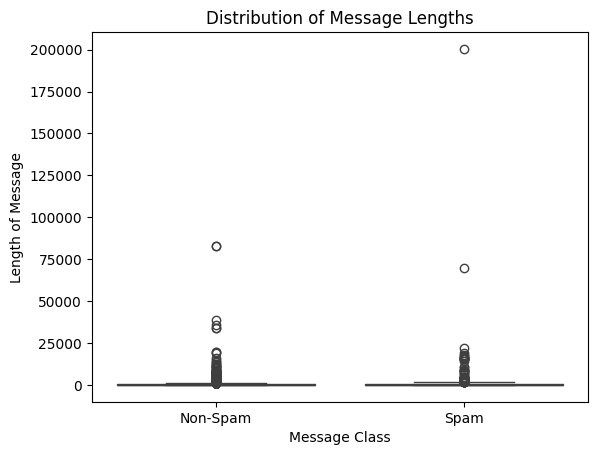

In [16]:
# Assuming you add a 'length' column that contains the length of each message
df["length"] = df["message"].astype(str).apply(len)
sns.boxplot(data=df, x="spam", y="length")
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Class")
plt.ylabel("Length of Message")
plt.xticks(ticks=[0, 1], labels=["Non-Spam", "Spam"])
plt.show()

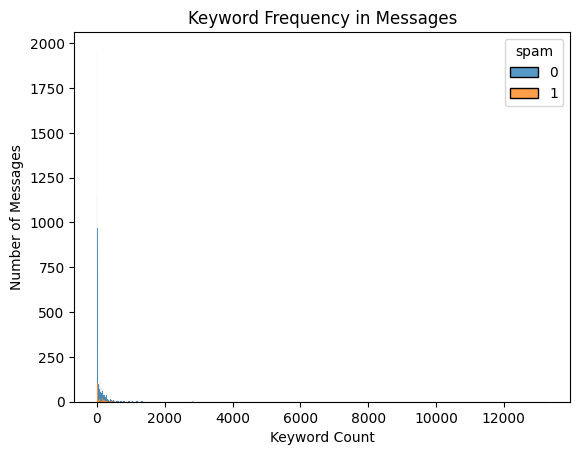

In [19]:
df["keyword_count"] = df["message"].dropna().str.split().apply(len)
sns.histplot(data=df, x="keyword_count", hue="spam", multiple="stack")
plt.title("Keyword Frequency in Messages")
plt.xlabel("Keyword Count")
plt.ylabel("Number of Messages")
plt.show()

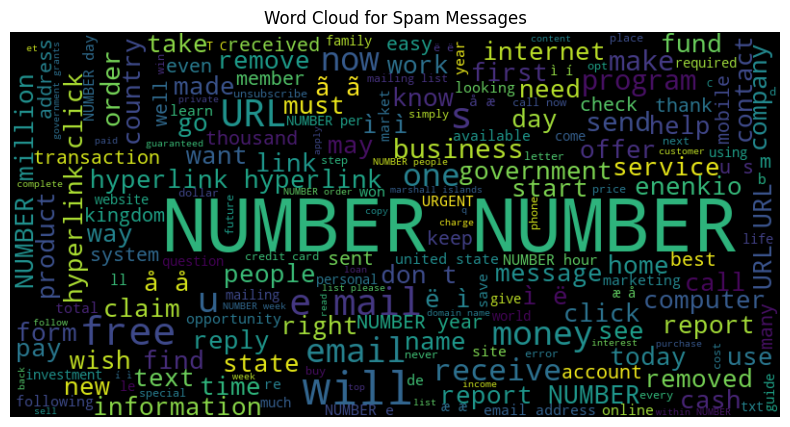

In [21]:
from wordcloud import WordCloud

# Generate a word cloud for spam messages
spam_messages = df[df["spam"] == 1]["message"].str.cat(sep=" ")
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_messages)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Key Words for Spam Messages")
plt.show()